# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [4]:
df = pd.read_csv(os.path.join('..', 'DAT-NYC-45','unit-project', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [5]:
# TODO
df.notnull().sum()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: Non-null observations = 1,595

> ### Question 2.  Create a summary table.

In [6]:
# TODO
df.dropna().describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [7]:
# TODO
df['gre'].var()

13369.953039758006

In [8]:
df['gpa'].var()

0.14487948622204228

Answer: gre would have a larger variance than gpa because gre max and min observations are farther from the mean than the max and min observations of gpa. Therefore, within our dataset, there is higher variability in gre scores than gpa scores. There is also a greater range of possible values for gre than for gpa.

> ### Question 4.  Drop data points with missing data.

In [9]:
# TODO
df= df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [10]:
# TODO
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: The isnull function identifies missing data. I've summed up to see all the missing data and the calculation returned zero across all columns.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

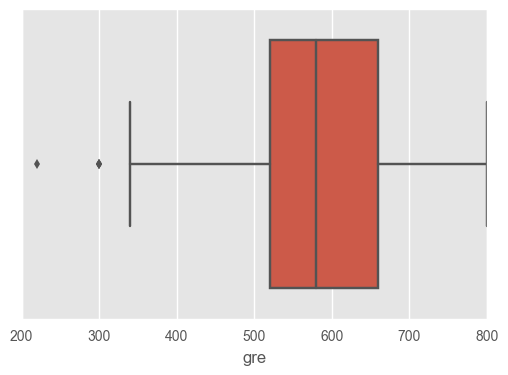

In [11]:
# TODO
sns.boxplot(x=df['gre']);

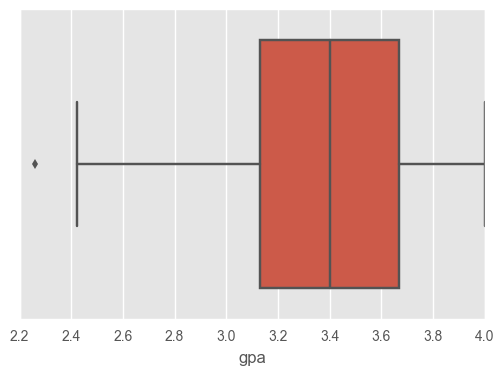

In [12]:
# TODO
sns.boxplot(x=df['gpa']);

> ### Question 7.  What do boxplots show?

Answer: Boxplots show the distribution of the variable that is plotted, as well as max, min, and mean values.

> ### Question 8.  Plot the distribution of each variable.

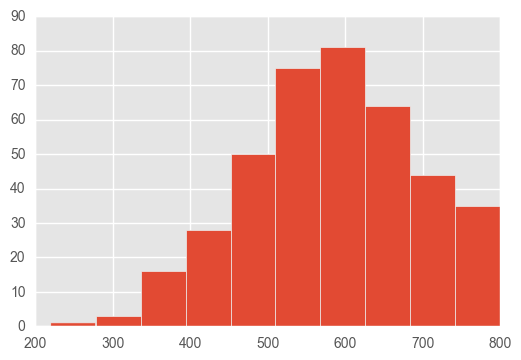

In [13]:
# TODO
df['gre'].hist();

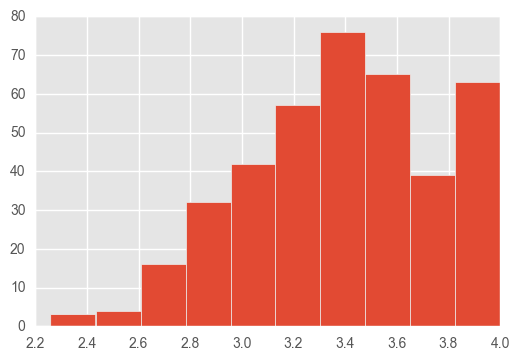

In [14]:
# TODO
df['gpa'].hist();

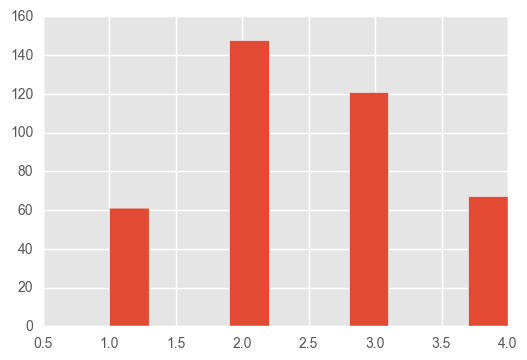

In [15]:
# TODO
df['prestige'].hist();

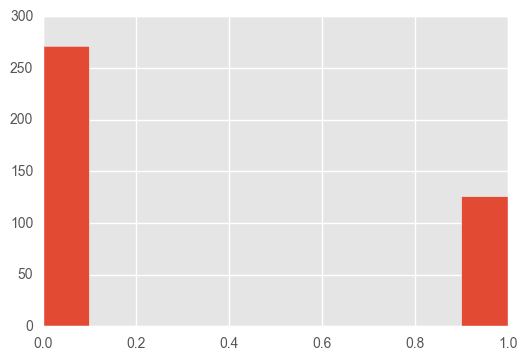

In [16]:
# TODO
df['admit'].hist()

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

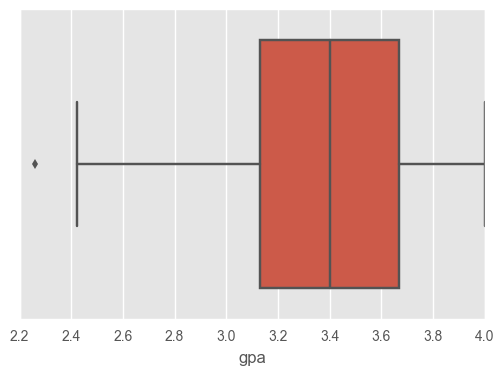

In [47]:
# TODO 
sns.boxplot(df['gpa']);

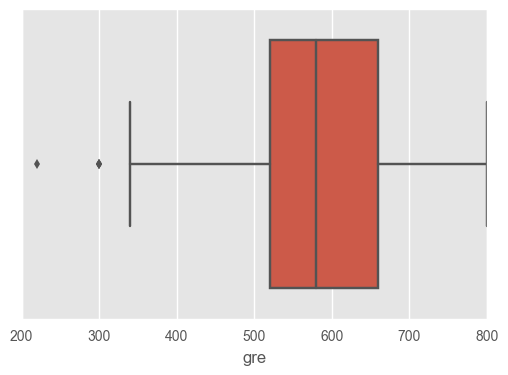

In [48]:
# TODO 
sns.boxplot(df['gre']);

In [53]:
df['gpa'].min()

2.2599999999999998

In [50]:
df[df['gre']==df['gre'].min()]['gpa']

304    2.83
Name: gpa, dtype: float64

In [52]:
df['gre'].min()

220.0

In [51]:
df[df['gpa']==df['gpa'].min()]['gre']

289    420.0
Name: gre, dtype: float64

Answer: gpa is normally distributed while gre is not. gre is left-skewed. For modeling purposes it would be best if both variables were normally distributed. In this case we could decide to remove the outlier observations in gre that are skewing its distribution. As a result gre will have new mean, std, min, and max values and will be more normally distributed.

> ### Question 10.  Create a correlation matrix for the dataset

In [17]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [18]:
df.cov()

,admit,gre,gpa,prestige
admit,0.217197,9.772155,0.030852,-0.107505
gre,9.772155,13390.606315,16.824761,-13.648068
gpa,0.030852,16.824761,0.144558,-0.021957
prestige,-0.107505,-13.648068,-0.021957,0.896967


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: None of our variables are strongly correlated.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: First, use descriptive statistics (describe method) to get the max, min, mean and standard devation values of admit and prestige. Second, determine distribution, and any outliers in the process, of each variable using histogram, boxplot, or scatter plot. Decide whether or not to drop the outlier values; this will change the descriptive statistics first calculated. The distribution of these two variables is not Gaussian but Bernoulli distribution, since they are categorical variables. As a result, for modeling purposes, a simple Linear Regression cannot be used; We can use logistic regression or k Nearest Neighbors model.

> ### Question 13.  What is your hypothesis?

Answer: gpa is the variable that most influences a candidate's graduate school admission.